## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              86.88
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   1.49e-106
Time:                        16:05:18   Log-Likelihood:                         -297.78
No. Observations:                 404   AIC:                                      621.6
Df Residuals:                     391   BIC:                                      673.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

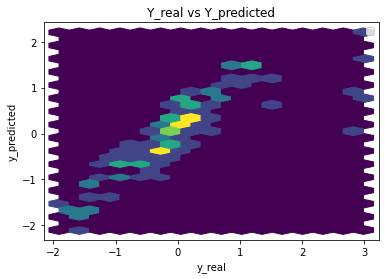

Performance Metrics
Mean Squared Error: 0.31136398975473467
Mean Absolute Error: 0.3533031057266751
Manhattan distance: 36.03691678412087
Euclidean distance: 5.6355236628890975


Stats Model MAE 0.3533031057266751


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548
0:	learn: 0.9750674	total: 59.3ms	remaining: 59.2s
1:	learn: 0.9532090	total: 66.1ms	remaining: 33s
2:	learn: 0.9319482	total: 68.8ms	remaining: 22.9s
3:	learn: 0.9116834	total: 70.6ms	remaining: 17.6s
4:	learn: 0.8927950	total: 72.2ms	remaining: 14.4s
5:	learn: 0.8766542	total: 73.9ms	remaining: 12.2s
6:	learn: 0.8579990	total: 75.5ms	remaining: 10.7s
7:	learn: 0.8403450	total: 77.1ms	remaining: 9.56s
8:	learn: 0.8238804	total: 78.6ms	remaining: 8.65s
9:	learn: 0.8073582	total: 83.4ms	remaining: 8.26s
10:	learn: 0.7902952	total: 90.2ms	remaining: 8.11s
11:	learn: 0.7749071	total: 93.5ms	remaining: 7.7s
12:	learn: 0.7588330	total: 101ms	remaining: 7.66s
13:	learn: 0.7427422	total: 103ms	remaining: 7.23s
14:	learn: 0.7298992	total: 105ms	remaining: 6.88s


15:	learn: 0.7150336	total: 109ms	remaining: 6.71s
16:	learn: 0.7029684	total: 111ms	remaining: 6.44s
17:	learn: 0.6906844	total: 113ms	remaining: 6.17s
18:	learn: 0.6775237	total: 115ms	remaining: 5.93s
19:	learn: 0.6648149	total: 116ms	remaining: 5.71s
20:	learn: 0.6538941	total: 118ms	remaining: 5.5s
21:	learn: 0.6434595	total: 121ms	remaining: 5.4s
22:	learn: 0.6315338	total: 124ms	remaining: 5.26s
23:	learn: 0.6214980	total: 126ms	remaining: 5.11s
24:	learn: 0.6110814	total: 127ms	remaining: 4.97s
25:	learn: 0.6019941	total: 129ms	remaining: 4.83s
26:	learn: 0.5932244	total: 131ms	remaining: 4.7s
27:	learn: 0.5834324	total: 132ms	remaining: 4.59s
28:	learn: 0.5736212	total: 134ms	remaining: 4.48s
29:	learn: 0.5638939	total: 135ms	remaining: 4.37s
30:	learn: 0.5542341	total: 137ms	remaining: 4.28s


31:	learn: 0.5464758	total: 139ms	remaining: 4.2s
32:	learn: 0.5398243	total: 141ms	remaining: 4.13s
33:	learn: 0.5324782	total: 142ms	remaining: 4.04s
34:	learn: 0.5249147	total: 144ms	remaining: 3.97s
35:	learn: 0.5175791	total: 145ms	remaining: 3.89s
36:	learn: 0.5107329	total: 147ms	remaining: 3.82s
37:	learn: 0.5032967	total: 148ms	remaining: 3.75s
38:	learn: 0.4968957	total: 150ms	remaining: 3.69s
39:	learn: 0.4897338	total: 151ms	remaining: 3.62s
40:	learn: 0.4837963	total: 152ms	remaining: 3.56s
41:	learn: 0.4766413	total: 154ms	remaining: 3.51s
42:	learn: 0.4723922	total: 155ms	remaining: 3.44s
43:	learn: 0.4673058	total: 156ms	remaining: 3.39s
44:	learn: 0.4621001	total: 157ms	remaining: 3.34s
45:	learn: 0.4567761	total: 159ms	remaining: 3.29s
46:	learn: 0.4520182	total: 160ms	remaining: 3.25s
47:	learn: 0.4472657	total: 162ms	remaining: 3.2s
48:	learn: 0.4430982	total: 163ms	remaining: 3.16s
49:	learn: 0.4379695	total: 164ms	remaining: 3.12s
50:	learn: 0.4335531	total: 166ms

62:	learn: 0.3854496	total: 182ms	remaining: 2.71s
63:	learn: 0.3823565	total: 184ms	remaining: 2.69s
64:	learn: 0.3787716	total: 185ms	remaining: 2.66s
65:	learn: 0.3754895	total: 187ms	remaining: 2.64s
66:	learn: 0.3720594	total: 188ms	remaining: 2.62s
67:	learn: 0.3691987	total: 189ms	remaining: 2.59s
68:	learn: 0.3661110	total: 191ms	remaining: 2.57s
69:	learn: 0.3624814	total: 192ms	remaining: 2.55s
70:	learn: 0.3594462	total: 193ms	remaining: 2.53s
71:	learn: 0.3561879	total: 195ms	remaining: 2.51s
72:	learn: 0.3539706	total: 196ms	remaining: 2.48s
73:	learn: 0.3519341	total: 197ms	remaining: 2.46s
74:	learn: 0.3490830	total: 198ms	remaining: 2.44s
75:	learn: 0.3464355	total: 199ms	remaining: 2.42s
76:	learn: 0.3441334	total: 201ms	remaining: 2.4s
77:	learn: 0.3417266	total: 202ms	remaining: 2.38s
78:	learn: 0.3386629	total: 203ms	remaining: 2.37s
79:	learn: 0.3364205	total: 204ms	remaining: 2.35s
80:	learn: 0.3342885	total: 205ms	remaining: 2.33s
81:	learn: 0.3320093	total: 207m

100:	learn: 0.2979570	total: 241ms	remaining: 2.15s
101:	learn: 0.2964263	total: 244ms	remaining: 2.15s
102:	learn: 0.2953475	total: 246ms	remaining: 2.14s
103:	learn: 0.2942112	total: 249ms	remaining: 2.14s
104:	learn: 0.2928046	total: 251ms	remaining: 2.14s
105:	learn: 0.2912975	total: 253ms	remaining: 2.14s
106:	learn: 0.2896379	total: 256ms	remaining: 2.13s


107:	learn: 0.2891595	total: 258ms	remaining: 2.13s
108:	learn: 0.2882494	total: 260ms	remaining: 2.13s
109:	learn: 0.2876481	total: 263ms	remaining: 2.12s
110:	learn: 0.2864887	total: 265ms	remaining: 2.12s
111:	learn: 0.2853513	total: 268ms	remaining: 2.13s
112:	learn: 0.2839359	total: 271ms	remaining: 2.13s
113:	learn: 0.2825250	total: 273ms	remaining: 2.12s
114:	learn: 0.2815372	total: 274ms	remaining: 2.11s
115:	learn: 0.2807457	total: 275ms	remaining: 2.1s
116:	learn: 0.2799020	total: 277ms	remaining: 2.09s
117:	learn: 0.2783737	total: 278ms	remaining: 2.08s
118:	learn: 0.2778255	total: 279ms	remaining: 2.07s
119:	learn: 0.2771130	total: 281ms	remaining: 2.06s
120:	learn: 0.2760246	total: 282ms	remaining: 2.05s
121:	learn: 0.2754461	total: 283ms	remaining: 2.04s
122:	learn: 0.2740150	total: 284ms	remaining: 2.03s
123:	learn: 0.2728739	total: 286ms	remaining: 2.02s
124:	learn: 0.2716473	total: 287ms	remaining: 2.01s
125:	learn: 0.2707230	total: 288ms	remaining: 2s
126:	learn: 0.26

130:	learn: 0.2656892	total: 295ms	remaining: 1.96s
131:	learn: 0.2649580	total: 297ms	remaining: 1.95s
132:	learn: 0.2638929	total: 298ms	remaining: 1.94s
133:	learn: 0.2628291	total: 299ms	remaining: 1.94s
134:	learn: 0.2615794	total: 301ms	remaining: 1.93s
135:	learn: 0.2605615	total: 302ms	remaining: 1.92s
136:	learn: 0.2596700	total: 303ms	remaining: 1.91s
137:	learn: 0.2591353	total: 304ms	remaining: 1.9s
138:	learn: 0.2585300	total: 306ms	remaining: 1.89s
139:	learn: 0.2576467	total: 307ms	remaining: 1.88s
140:	learn: 0.2569528	total: 308ms	remaining: 1.88s
141:	learn: 0.2562584	total: 309ms	remaining: 1.87s
142:	learn: 0.2551519	total: 311ms	remaining: 1.86s
143:	learn: 0.2543947	total: 312ms	remaining: 1.85s
144:	learn: 0.2534065	total: 314ms	remaining: 1.85s
145:	learn: 0.2526393	total: 319ms	remaining: 1.86s
146:	learn: 0.2516308	total: 322ms	remaining: 1.87s
147:	learn: 0.2509963	total: 324ms	remaining: 1.86s
148:	learn: 0.2500643	total: 325ms	remaining: 1.86s
149:	learn: 0

196:	learn: 0.2194324	total: 422ms	remaining: 1.72s
197:	learn: 0.2190055	total: 425ms	remaining: 1.72s
198:	learn: 0.2186696	total: 426ms	remaining: 1.72s
199:	learn: 0.2179334	total: 428ms	remaining: 1.71s
200:	learn: 0.2168113	total: 429ms	remaining: 1.71s
201:	learn: 0.2166642	total: 430ms	remaining: 1.7s
202:	learn: 0.2162154	total: 432ms	remaining: 1.7s
203:	learn: 0.2158467	total: 433ms	remaining: 1.69s
204:	learn: 0.2156451	total: 435ms	remaining: 1.69s


205:	learn: 0.2151170	total: 436ms	remaining: 1.68s
206:	learn: 0.2143263	total: 438ms	remaining: 1.68s
207:	learn: 0.2137845	total: 440ms	remaining: 1.67s
208:	learn: 0.2133661	total: 441ms	remaining: 1.67s
209:	learn: 0.2131572	total: 442ms	remaining: 1.66s
210:	learn: 0.2128597	total: 444ms	remaining: 1.66s
211:	learn: 0.2126980	total: 447ms	remaining: 1.66s
212:	learn: 0.2119270	total: 453ms	remaining: 1.67s
213:	learn: 0.2113155	total: 458ms	remaining: 1.68s
214:	learn: 0.2110438	total: 460ms	remaining: 1.68s
215:	learn: 0.2106736	total: 463ms	remaining: 1.68s
216:	learn: 0.2104993	total: 465ms	remaining: 1.68s
217:	learn: 0.2100823	total: 468ms	remaining: 1.68s
218:	learn: 0.2095523	total: 471ms	remaining: 1.68s
219:	learn: 0.2090308	total: 474ms	remaining: 1.68s
220:	learn: 0.2084233	total: 476ms	remaining: 1.68s


221:	learn: 0.2078713	total: 480ms	remaining: 1.68s
222:	learn: 0.2077812	total: 482ms	remaining: 1.68s
223:	learn: 0.2073123	total: 487ms	remaining: 1.69s
224:	learn: 0.2066023	total: 490ms	remaining: 1.69s
225:	learn: 0.2063036	total: 496ms	remaining: 1.7s
226:	learn: 0.2058587	total: 498ms	remaining: 1.7s
227:	learn: 0.2051035	total: 500ms	remaining: 1.69s
228:	learn: 0.2049080	total: 502ms	remaining: 1.69s
229:	learn: 0.2047203	total: 505ms	remaining: 1.69s
230:	learn: 0.2043545	total: 507ms	remaining: 1.69s
231:	learn: 0.2039580	total: 508ms	remaining: 1.68s
232:	learn: 0.2037621	total: 509ms	remaining: 1.68s
233:	learn: 0.2035700	total: 511ms	remaining: 1.67s
234:	learn: 0.2030230	total: 512ms	remaining: 1.67s
235:	learn: 0.2023473	total: 514ms	remaining: 1.66s
236:	learn: 0.2017855	total: 515ms	remaining: 1.66s
237:	learn: 0.2016130	total: 516ms	remaining: 1.65s
238:	learn: 0.2013942	total: 518ms	remaining: 1.65s
239:	learn: 0.2008526	total: 521ms	remaining: 1.65s
240:	learn: 0.

266:	learn: 0.1901777	total: 585ms	remaining: 1.6s
267:	learn: 0.1897522	total: 588ms	remaining: 1.61s
268:	learn: 0.1893803	total: 590ms	remaining: 1.6s
269:	learn: 0.1887870	total: 592ms	remaining: 1.6s
270:	learn: 0.1882219	total: 594ms	remaining: 1.6s
271:	learn: 0.1877898	total: 596ms	remaining: 1.59s


272:	learn: 0.1872418	total: 597ms	remaining: 1.59s
273:	learn: 0.1867052	total: 600ms	remaining: 1.59s
274:	learn: 0.1864410	total: 604ms	remaining: 1.59s
275:	learn: 0.1858133	total: 607ms	remaining: 1.59s
276:	learn: 0.1852546	total: 610ms	remaining: 1.59s
277:	learn: 0.1848842	total: 612ms	remaining: 1.59s
278:	learn: 0.1842891	total: 614ms	remaining: 1.59s
279:	learn: 0.1836650	total: 617ms	remaining: 1.59s
280:	learn: 0.1835946	total: 623ms	remaining: 1.59s
281:	learn: 0.1835458	total: 625ms	remaining: 1.59s
282:	learn: 0.1830649	total: 627ms	remaining: 1.59s
283:	learn: 0.1827130	total: 628ms	remaining: 1.58s
284:	learn: 0.1826520	total: 630ms	remaining: 1.58s
285:	learn: 0.1820663	total: 633ms	remaining: 1.58s
286:	learn: 0.1816409	total: 635ms	remaining: 1.58s
287:	learn: 0.1810858	total: 636ms	remaining: 1.57s
288:	learn: 0.1808929	total: 638ms	remaining: 1.57s


289:	learn: 0.1802810	total: 640ms	remaining: 1.57s
290:	learn: 0.1798777	total: 642ms	remaining: 1.56s
291:	learn: 0.1793979	total: 644ms	remaining: 1.56s
292:	learn: 0.1790273	total: 646ms	remaining: 1.56s
293:	learn: 0.1785007	total: 648ms	remaining: 1.55s
294:	learn: 0.1779730	total: 649ms	remaining: 1.55s
295:	learn: 0.1775208	total: 656ms	remaining: 1.56s
296:	learn: 0.1771088	total: 660ms	remaining: 1.56s
297:	learn: 0.1766484	total: 662ms	remaining: 1.56s
298:	learn: 0.1765233	total: 665ms	remaining: 1.56s
299:	learn: 0.1759224	total: 668ms	remaining: 1.56s
300:	learn: 0.1755541	total: 673ms	remaining: 1.56s
301:	learn: 0.1751494	total: 675ms	remaining: 1.56s
302:	learn: 0.1747374	total: 677ms	remaining: 1.56s
303:	learn: 0.1742282	total: 678ms	remaining: 1.55s
304:	learn: 0.1736923	total: 680ms	remaining: 1.55s
305:	learn: 0.1734374	total: 681ms	remaining: 1.54s
306:	learn: 0.1731217	total: 683ms	remaining: 1.54s
307:	learn: 0.1727531	total: 686ms	remaining: 1.54s
308:	learn: 

332:	learn: 0.1629104	total: 753ms	remaining: 1.51s
333:	learn: 0.1628710	total: 755ms	remaining: 1.5s
334:	learn: 0.1625043	total: 757ms	remaining: 1.5s
335:	learn: 0.1619033	total: 758ms	remaining: 1.5s
336:	learn: 0.1614558	total: 759ms	remaining: 1.49s
337:	learn: 0.1610804	total: 760ms	remaining: 1.49s
338:	learn: 0.1605258	total: 762ms	remaining: 1.49s
339:	learn: 0.1602854	total: 763ms	remaining: 1.48s
340:	learn: 0.1600253	total: 765ms	remaining: 1.48s


341:	learn: 0.1597128	total: 769ms	remaining: 1.48s
342:	learn: 0.1593160	total: 772ms	remaining: 1.48s
343:	learn: 0.1589536	total: 773ms	remaining: 1.47s
344:	learn: 0.1585873	total: 776ms	remaining: 1.47s
345:	learn: 0.1581244	total: 783ms	remaining: 1.48s
346:	learn: 0.1577826	total: 784ms	remaining: 1.48s
347:	learn: 0.1573665	total: 786ms	remaining: 1.47s
348:	learn: 0.1572766	total: 788ms	remaining: 1.47s
349:	learn: 0.1568909	total: 790ms	remaining: 1.47s
350:	learn: 0.1566520	total: 792ms	remaining: 1.46s
351:	learn: 0.1562260	total: 793ms	remaining: 1.46s
352:	learn: 0.1559058	total: 795ms	remaining: 1.46s
353:	learn: 0.1554253	total: 796ms	remaining: 1.45s
354:	learn: 0.1549762	total: 798ms	remaining: 1.45s
355:	learn: 0.1545592	total: 799ms	remaining: 1.45s
356:	learn: 0.1540860	total: 800ms	remaining: 1.44s
357:	learn: 0.1538624	total: 802ms	remaining: 1.44s
358:	learn: 0.1535067	total: 803ms	remaining: 1.43s
359:	learn: 0.1532420	total: 804ms	remaining: 1.43s
360:	learn: 

363:	learn: 0.1517777	total: 810ms	remaining: 1.42s
364:	learn: 0.1513658	total: 812ms	remaining: 1.41s
365:	learn: 0.1510144	total: 819ms	remaining: 1.42s
366:	learn: 0.1507272	total: 822ms	remaining: 1.42s
367:	learn: 0.1504902	total: 824ms	remaining: 1.41s
368:	learn: 0.1503368	total: 825ms	remaining: 1.41s
369:	learn: 0.1500060	total: 827ms	remaining: 1.41s
370:	learn: 0.1495972	total: 828ms	remaining: 1.4s
371:	learn: 0.1495436	total: 829ms	remaining: 1.4s
372:	learn: 0.1492344	total: 831ms	remaining: 1.4s
373:	learn: 0.1489522	total: 833ms	remaining: 1.39s
374:	learn: 0.1486289	total: 835ms	remaining: 1.39s
375:	learn: 0.1484033	total: 837ms	remaining: 1.39s
376:	learn: 0.1481448	total: 838ms	remaining: 1.39s
377:	learn: 0.1477344	total: 840ms	remaining: 1.38s
378:	learn: 0.1475097	total: 842ms	remaining: 1.38s
379:	learn: 0.1472241	total: 843ms	remaining: 1.38s
380:	learn: 0.1468118	total: 845ms	remaining: 1.37s
381:	learn: 0.1464576	total: 846ms	remaining: 1.37s
382:	learn: 0.1

433:	learn: 0.1331082	total: 933ms	remaining: 1.22s
434:	learn: 0.1328182	total: 934ms	remaining: 1.21s
435:	learn: 0.1325697	total: 935ms	remaining: 1.21s
436:	learn: 0.1323277	total: 937ms	remaining: 1.21s
437:	learn: 0.1319733	total: 938ms	remaining: 1.2s
438:	learn: 0.1317354	total: 940ms	remaining: 1.2s
439:	learn: 0.1313883	total: 941ms	remaining: 1.2s
440:	learn: 0.1309886	total: 943ms	remaining: 1.19s
441:	learn: 0.1309665	total: 944ms	remaining: 1.19s
442:	learn: 0.1306932	total: 945ms	remaining: 1.19s


443:	learn: 0.1305051	total: 948ms	remaining: 1.19s
444:	learn: 0.1304813	total: 949ms	remaining: 1.18s
445:	learn: 0.1301778	total: 950ms	remaining: 1.18s
446:	learn: 0.1297821	total: 952ms	remaining: 1.18s
447:	learn: 0.1296674	total: 953ms	remaining: 1.17s
448:	learn: 0.1294396	total: 954ms	remaining: 1.17s
449:	learn: 0.1292228	total: 956ms	remaining: 1.17s
450:	learn: 0.1289817	total: 957ms	remaining: 1.17s
451:	learn: 0.1288277	total: 959ms	remaining: 1.16s
452:	learn: 0.1285815	total: 960ms	remaining: 1.16s
453:	learn: 0.1282993	total: 961ms	remaining: 1.16s
454:	learn: 0.1281785	total: 963ms	remaining: 1.15s
455:	learn: 0.1279681	total: 964ms	remaining: 1.15s
456:	learn: 0.1278040	total: 965ms	remaining: 1.15s
457:	learn: 0.1277552	total: 967ms	remaining: 1.14s
458:	learn: 0.1275647	total: 968ms	remaining: 1.14s
459:	learn: 0.1273914	total: 970ms	remaining: 1.14s
460:	learn: 0.1270488	total: 971ms	remaining: 1.14s
461:	learn: 0.1268402	total: 973ms	remaining: 1.13s
462:	learn: 

471:	learn: 0.1247565	total: 988ms	remaining: 1.1s
472:	learn: 0.1245454	total: 990ms	remaining: 1.1s
473:	learn: 0.1241685	total: 991ms	remaining: 1.1s
474:	learn: 0.1238809	total: 993ms	remaining: 1.1s
475:	learn: 0.1235632	total: 994ms	remaining: 1.09s
476:	learn: 0.1232495	total: 996ms	remaining: 1.09s
477:	learn: 0.1230154	total: 997ms	remaining: 1.09s
478:	learn: 0.1229742	total: 998ms	remaining: 1.08s
479:	learn: 0.1227733	total: 1000ms	remaining: 1.08s
480:	learn: 0.1227371	total: 1s	remaining: 1.08s
481:	learn: 0.1224607	total: 1s	remaining: 1.08s
482:	learn: 0.1221067	total: 1s	remaining: 1.07s
483:	learn: 0.1219431	total: 1s	remaining: 1.07s
484:	learn: 0.1216473	total: 1.01s	remaining: 1.07s
485:	learn: 0.1213851	total: 1.01s	remaining: 1.07s
486:	learn: 0.1210974	total: 1.01s	remaining: 1.06s
487:	learn: 0.1208943	total: 1.01s	remaining: 1.06s
488:	learn: 0.1205387	total: 1.01s	remaining: 1.06s
489:	learn: 0.1203479	total: 1.01s	remaining: 1.06s
490:	learn: 0.1202898	total

535:	learn: 0.1115178	total: 1.11s	remaining: 963ms
536:	learn: 0.1113579	total: 1.11s	remaining: 961ms
537:	learn: 0.1111576	total: 1.12s	remaining: 960ms
538:	learn: 0.1110799	total: 1.12s	remaining: 957ms
539:	learn: 0.1108127	total: 1.12s	remaining: 955ms
540:	learn: 0.1105243	total: 1.12s	remaining: 952ms
541:	learn: 0.1103433	total: 1.12s	remaining: 949ms


542:	learn: 0.1102668	total: 1.13s	remaining: 947ms
543:	learn: 0.1100796	total: 1.13s	remaining: 946ms
544:	learn: 0.1098998	total: 1.13s	remaining: 943ms
545:	learn: 0.1096583	total: 1.13s	remaining: 942ms
546:	learn: 0.1095117	total: 1.13s	remaining: 940ms
547:	learn: 0.1093683	total: 1.14s	remaining: 937ms
548:	learn: 0.1091935	total: 1.14s	remaining: 934ms
549:	learn: 0.1089949	total: 1.14s	remaining: 933ms
550:	learn: 0.1088439	total: 1.14s	remaining: 931ms
551:	learn: 0.1085579	total: 1.14s	remaining: 928ms
552:	learn: 0.1083246	total: 1.15s	remaining: 931ms
553:	learn: 0.1081743	total: 1.16s	remaining: 931ms
554:	learn: 0.1079844	total: 1.16s	remaining: 930ms
555:	learn: 0.1077472	total: 1.16s	remaining: 930ms


556:	learn: 0.1075572	total: 1.17s	remaining: 930ms
557:	learn: 0.1074637	total: 1.17s	remaining: 929ms
558:	learn: 0.1074176	total: 1.17s	remaining: 926ms
559:	learn: 0.1073598	total: 1.18s	remaining: 925ms
560:	learn: 0.1073318	total: 1.18s	remaining: 923ms
561:	learn: 0.1070916	total: 1.18s	remaining: 920ms
562:	learn: 0.1068272	total: 1.18s	remaining: 918ms
563:	learn: 0.1066921	total: 1.19s	remaining: 918ms
564:	learn: 0.1065001	total: 1.19s	remaining: 915ms
565:	learn: 0.1062551	total: 1.19s	remaining: 914ms
566:	learn: 0.1060348	total: 1.19s	remaining: 912ms
567:	learn: 0.1057496	total: 1.2s	remaining: 909ms
568:	learn: 0.1057031	total: 1.2s	remaining: 907ms
569:	learn: 0.1055372	total: 1.2s	remaining: 905ms
570:	learn: 0.1053299	total: 1.2s	remaining: 903ms
571:	learn: 0.1051791	total: 1.21s	remaining: 904ms
572:	learn: 0.1049673	total: 1.21s	remaining: 902ms
573:	learn: 0.1047994	total: 1.21s	remaining: 899ms
574:	learn: 0.1046593	total: 1.21s	remaining: 897ms
575:	learn: 0.10

611:	learn: 0.0983362	total: 1.29s	remaining: 819ms
612:	learn: 0.0982038	total: 1.29s	remaining: 817ms
613:	learn: 0.0980201	total: 1.29s	remaining: 814ms
614:	learn: 0.0978866	total: 1.3s	remaining: 811ms
615:	learn: 0.0976838	total: 1.3s	remaining: 809ms
616:	learn: 0.0974879	total: 1.3s	remaining: 806ms
617:	learn: 0.0972221	total: 1.3s	remaining: 804ms
618:	learn: 0.0969943	total: 1.3s	remaining: 801ms
619:	learn: 0.0968344	total: 1.3s	remaining: 798ms
620:	learn: 0.0965823	total: 1.3s	remaining: 796ms


621:	learn: 0.0964013	total: 1.31s	remaining: 794ms
622:	learn: 0.0961915	total: 1.31s	remaining: 791ms
623:	learn: 0.0960411	total: 1.31s	remaining: 789ms
624:	learn: 0.0958149	total: 1.31s	remaining: 786ms
625:	learn: 0.0957118	total: 1.31s	remaining: 784ms
626:	learn: 0.0953939	total: 1.31s	remaining: 781ms
627:	learn: 0.0952146	total: 1.31s	remaining: 778ms
628:	learn: 0.0950162	total: 1.31s	remaining: 776ms
629:	learn: 0.0949433	total: 1.32s	remaining: 773ms
630:	learn: 0.0946859	total: 1.32s	remaining: 770ms
631:	learn: 0.0945037	total: 1.32s	remaining: 768ms
632:	learn: 0.0943205	total: 1.32s	remaining: 765ms
633:	learn: 0.0941066	total: 1.32s	remaining: 763ms
634:	learn: 0.0939176	total: 1.32s	remaining: 760ms
635:	learn: 0.0937639	total: 1.32s	remaining: 758ms
636:	learn: 0.0935238	total: 1.32s	remaining: 755ms
637:	learn: 0.0933188	total: 1.33s	remaining: 753ms
638:	learn: 0.0930851	total: 1.33s	remaining: 751ms
639:	learn: 0.0929242	total: 1.33s	remaining: 748ms
640:	learn: 

652:	learn: 0.0909476	total: 1.35s	remaining: 717ms
653:	learn: 0.0908972	total: 1.35s	remaining: 715ms
654:	learn: 0.0907978	total: 1.35s	remaining: 712ms
655:	learn: 0.0906382	total: 1.35s	remaining: 710ms
656:	learn: 0.0905747	total: 1.35s	remaining: 707ms
657:	learn: 0.0903514	total: 1.36s	remaining: 705ms
658:	learn: 0.0902337	total: 1.36s	remaining: 702ms
659:	learn: 0.0901164	total: 1.36s	remaining: 700ms
660:	learn: 0.0900367	total: 1.36s	remaining: 698ms
661:	learn: 0.0898771	total: 1.36s	remaining: 695ms
662:	learn: 0.0896554	total: 1.36s	remaining: 693ms
663:	learn: 0.0895244	total: 1.36s	remaining: 691ms
664:	learn: 0.0893715	total: 1.37s	remaining: 688ms
665:	learn: 0.0892949	total: 1.37s	remaining: 686ms
666:	learn: 0.0891561	total: 1.37s	remaining: 684ms
667:	learn: 0.0890533	total: 1.37s	remaining: 681ms
668:	learn: 0.0890025	total: 1.37s	remaining: 679ms
669:	learn: 0.0889009	total: 1.37s	remaining: 676ms
670:	learn: 0.0886977	total: 1.37s	remaining: 674ms
671:	learn: 

730:	learn: 0.0808710	total: 1.47s	remaining: 541ms
731:	learn: 0.0807150	total: 1.47s	remaining: 539ms
732:	learn: 0.0806063	total: 1.47s	remaining: 537ms
733:	learn: 0.0804159	total: 1.47s	remaining: 534ms
734:	learn: 0.0802645	total: 1.48s	remaining: 532ms
735:	learn: 0.0801991	total: 1.48s	remaining: 530ms
736:	learn: 0.0800084	total: 1.48s	remaining: 528ms
737:	learn: 0.0799222	total: 1.48s	remaining: 525ms
738:	learn: 0.0798632	total: 1.48s	remaining: 523ms
739:	learn: 0.0797750	total: 1.48s	remaining: 521ms


740:	learn: 0.0795767	total: 1.49s	remaining: 519ms
741:	learn: 0.0794996	total: 1.49s	remaining: 517ms
742:	learn: 0.0794331	total: 1.49s	remaining: 515ms
743:	learn: 0.0792693	total: 1.49s	remaining: 513ms
744:	learn: 0.0790696	total: 1.49s	remaining: 511ms
745:	learn: 0.0789747	total: 1.5s	remaining: 510ms
746:	learn: 0.0788315	total: 1.5s	remaining: 508ms
747:	learn: 0.0786760	total: 1.5s	remaining: 507ms
748:	learn: 0.0785371	total: 1.51s	remaining: 505ms
749:	learn: 0.0783857	total: 1.51s	remaining: 503ms
750:	learn: 0.0782659	total: 1.51s	remaining: 501ms
751:	learn: 0.0781856	total: 1.51s	remaining: 500ms
752:	learn: 0.0781116	total: 1.52s	remaining: 497ms
753:	learn: 0.0780096	total: 1.52s	remaining: 495ms
754:	learn: 0.0777595	total: 1.52s	remaining: 493ms
755:	learn: 0.0776356	total: 1.52s	remaining: 491ms
756:	learn: 0.0774767	total: 1.52s	remaining: 489ms
757:	learn: 0.0772768	total: 1.53s	remaining: 487ms


758:	learn: 0.0771602	total: 1.53s	remaining: 485ms
759:	learn: 0.0770590	total: 1.53s	remaining: 484ms
760:	learn: 0.0769408	total: 1.54s	remaining: 482ms
761:	learn: 0.0767246	total: 1.54s	remaining: 481ms
762:	learn: 0.0766182	total: 1.54s	remaining: 479ms
763:	learn: 0.0765407	total: 1.54s	remaining: 477ms
764:	learn: 0.0764645	total: 1.54s	remaining: 475ms
765:	learn: 0.0763208	total: 1.55s	remaining: 473ms
766:	learn: 0.0762174	total: 1.55s	remaining: 470ms
767:	learn: 0.0760941	total: 1.55s	remaining: 468ms
768:	learn: 0.0759493	total: 1.55s	remaining: 466ms
769:	learn: 0.0758101	total: 1.55s	remaining: 464ms
770:	learn: 0.0755622	total: 1.55s	remaining: 461ms
771:	learn: 0.0754383	total: 1.55s	remaining: 459ms
772:	learn: 0.0753107	total: 1.56s	remaining: 457ms
773:	learn: 0.0752019	total: 1.56s	remaining: 455ms
774:	learn: 0.0750629	total: 1.56s	remaining: 453ms
775:	learn: 0.0749371	total: 1.56s	remaining: 451ms
776:	learn: 0.0748714	total: 1.56s	remaining: 449ms
777:	learn: 

820:	learn: 0.0698938	total: 1.65s	remaining: 359ms
821:	learn: 0.0697836	total: 1.65s	remaining: 357ms
822:	learn: 0.0696930	total: 1.65s	remaining: 355ms
823:	learn: 0.0696276	total: 1.65s	remaining: 353ms
824:	learn: 0.0695596	total: 1.65s	remaining: 351ms
825:	learn: 0.0694690	total: 1.66s	remaining: 349ms
826:	learn: 0.0693968	total: 1.66s	remaining: 347ms
827:	learn: 0.0693195	total: 1.66s	remaining: 345ms
828:	learn: 0.0691207	total: 1.66s	remaining: 342ms
829:	learn: 0.0689479	total: 1.66s	remaining: 340ms
830:	learn: 0.0688152	total: 1.66s	remaining: 338ms


831:	learn: 0.0687241	total: 1.66s	remaining: 336ms
832:	learn: 0.0686630	total: 1.67s	remaining: 334ms
833:	learn: 0.0685511	total: 1.67s	remaining: 332ms
834:	learn: 0.0684347	total: 1.67s	remaining: 330ms
835:	learn: 0.0683676	total: 1.67s	remaining: 328ms
836:	learn: 0.0681978	total: 1.67s	remaining: 326ms
837:	learn: 0.0680512	total: 1.68s	remaining: 324ms
838:	learn: 0.0679467	total: 1.68s	remaining: 322ms
839:	learn: 0.0679001	total: 1.68s	remaining: 320ms
840:	learn: 0.0678125	total: 1.68s	remaining: 318ms
841:	learn: 0.0677955	total: 1.68s	remaining: 316ms
842:	learn: 0.0676780	total: 1.68s	remaining: 314ms
843:	learn: 0.0675436	total: 1.69s	remaining: 312ms
844:	learn: 0.0674602	total: 1.69s	remaining: 309ms
845:	learn: 0.0673672	total: 1.69s	remaining: 307ms
846:	learn: 0.0672779	total: 1.69s	remaining: 305ms
847:	learn: 0.0672137	total: 1.69s	remaining: 303ms
848:	learn: 0.0670916	total: 1.69s	remaining: 301ms
849:	learn: 0.0669787	total: 1.69s	remaining: 299ms
850:	learn: 

860:	learn: 0.0657610	total: 1.71s	remaining: 276ms
861:	learn: 0.0656272	total: 1.71s	remaining: 274ms
862:	learn: 0.0655306	total: 1.71s	remaining: 272ms
863:	learn: 0.0654446	total: 1.72s	remaining: 270ms
864:	learn: 0.0654334	total: 1.72s	remaining: 268ms
865:	learn: 0.0654276	total: 1.72s	remaining: 266ms
866:	learn: 0.0653835	total: 1.72s	remaining: 264ms
867:	learn: 0.0652935	total: 1.72s	remaining: 262ms
868:	learn: 0.0651917	total: 1.72s	remaining: 260ms
869:	learn: 0.0651299	total: 1.72s	remaining: 258ms
870:	learn: 0.0650291	total: 1.73s	remaining: 256ms
871:	learn: 0.0649064	total: 1.73s	remaining: 254ms
872:	learn: 0.0648112	total: 1.73s	remaining: 252ms
873:	learn: 0.0646914	total: 1.73s	remaining: 249ms
874:	learn: 0.0645693	total: 1.73s	remaining: 247ms
875:	learn: 0.0644842	total: 1.73s	remaining: 245ms
876:	learn: 0.0644530	total: 1.74s	remaining: 243ms
877:	learn: 0.0643547	total: 1.74s	remaining: 241ms
878:	learn: 0.0641985	total: 1.74s	remaining: 239ms
879:	learn: 

930:	learn: 0.0598489	total: 1.83s	remaining: 135ms
931:	learn: 0.0597564	total: 1.83s	remaining: 133ms
932:	learn: 0.0596208	total: 1.83s	remaining: 131ms
933:	learn: 0.0595287	total: 1.83s	remaining: 129ms
934:	learn: 0.0594052	total: 1.83s	remaining: 127ms
935:	learn: 0.0592725	total: 1.83s	remaining: 125ms
936:	learn: 0.0591180	total: 1.84s	remaining: 123ms
937:	learn: 0.0590502	total: 1.84s	remaining: 121ms
938:	learn: 0.0590404	total: 1.84s	remaining: 119ms
939:	learn: 0.0589440	total: 1.84s	remaining: 117ms
940:	learn: 0.0588565	total: 1.84s	remaining: 116ms
941:	learn: 0.0588246	total: 1.84s	remaining: 114ms


942:	learn: 0.0586870	total: 1.84s	remaining: 112ms
943:	learn: 0.0585619	total: 1.85s	remaining: 110ms
944:	learn: 0.0584831	total: 1.85s	remaining: 108ms
945:	learn: 0.0584380	total: 1.85s	remaining: 106ms
946:	learn: 0.0583319	total: 1.85s	remaining: 104ms
947:	learn: 0.0582320	total: 1.85s	remaining: 102ms
948:	learn: 0.0581174	total: 1.85s	remaining: 99.7ms
949:	learn: 0.0580617	total: 1.86s	remaining: 97.7ms
950:	learn: 0.0579950	total: 1.86s	remaining: 95.7ms
951:	learn: 0.0579291	total: 1.86s	remaining: 93.7ms
952:	learn: 0.0578221	total: 1.86s	remaining: 91.8ms
953:	learn: 0.0577781	total: 1.86s	remaining: 89.8ms
954:	learn: 0.0577209	total: 1.86s	remaining: 87.8ms
955:	learn: 0.0576833	total: 1.86s	remaining: 85.8ms
956:	learn: 0.0576057	total: 1.87s	remaining: 83.9ms
957:	learn: 0.0575345	total: 1.87s	remaining: 81.9ms
958:	learn: 0.0573798	total: 1.87s	remaining: 79.9ms
959:	learn: 0.0573107	total: 1.87s	remaining: 78ms
960:	learn: 0.0573041	total: 1.87s	remaining: 76ms
961

967:	learn: 0.0565999	total: 1.89s	remaining: 62.6ms
968:	learn: 0.0565017	total: 1.9s	remaining: 60.6ms
969:	learn: 0.0564078	total: 1.9s	remaining: 58.7ms
970:	learn: 0.0563297	total: 1.9s	remaining: 56.7ms
971:	learn: 0.0562994	total: 1.9s	remaining: 54.7ms
972:	learn: 0.0562131	total: 1.9s	remaining: 52.8ms
973:	learn: 0.0561761	total: 1.91s	remaining: 50.9ms
974:	learn: 0.0560955	total: 1.91s	remaining: 48.9ms
975:	learn: 0.0560102	total: 1.91s	remaining: 46.9ms
976:	learn: 0.0559339	total: 1.91s	remaining: 45ms
977:	learn: 0.0559246	total: 1.91s	remaining: 43.1ms
978:	learn: 0.0558757	total: 1.92s	remaining: 41.1ms
979:	learn: 0.0558011	total: 1.92s	remaining: 39.1ms
980:	learn: 0.0556851	total: 1.92s	remaining: 37.2ms
981:	learn: 0.0556180	total: 1.92s	remaining: 35.2ms
982:	learn: 0.0556022	total: 1.92s	remaining: 33.2ms
983:	learn: 0.0554859	total: 1.92s	remaining: 31.3ms
984:	learn: 0.0553734	total: 1.93s	remaining: 29.3ms
985:	learn: 0.0552931	total: 1.93s	remaining: 27.4ms


Catboost MAE 0.22618860114267694


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.62752 | train_mse: 1.0838  | train_mae: 0.7657  |  0:00:01s


epoch 1  | loss: 0.79924 | train_mse: 0.92222 | train_mae: 0.67208 |  0:00:01s


epoch 2  | loss: 0.60735 | train_mse: 0.52765 | train_mae: 0.52091 |  0:00:02s


epoch 3  | loss: 0.47591 | train_mse: 0.43688 | train_mae: 0.44139 |  0:00:02s


epoch 4  | loss: 0.44271 | train_mse: 0.40457 | train_mae: 0.40666 |  0:00:02s


epoch 5  | loss: 0.4127  | train_mse: 0.49864 | train_mae: 0.4285  |  0:00:03s


epoch 6  | loss: 0.29954 | train_mse: 0.33779 | train_mae: 0.39596 |  0:00:03s


epoch 7  | loss: 0.32753 | train_mse: 0.3231  | train_mae: 0.38028 |  0:00:03s


epoch 8  | loss: 0.31047 | train_mse: 0.25859 | train_mae: 0.35803 |  0:00:04s


epoch 9  | loss: 0.2584  | train_mse: 0.19779 | train_mae: 0.30447 |  0:00:04s


epoch 10 | loss: 0.27132 | train_mse: 0.29838 | train_mae: 0.39126 |  0:00:04s


epoch 11 | loss: 0.27134 | train_mse: 0.22451 | train_mae: 0.32622 |  0:00:05s


epoch 12 | loss: 0.28519 | train_mse: 0.19776 | train_mae: 0.31611 |  0:00:05s


epoch 13 | loss: 0.2395  | train_mse: 0.1752  | train_mae: 0.3013  |  0:00:05s


epoch 14 | loss: 0.25649 | train_mse: 0.18305 | train_mae: 0.30498 |  0:00:06s


epoch 15 | loss: 0.2636  | train_mse: 0.17824 | train_mae: 0.31153 |  0:00:06s


epoch 16 | loss: 0.25896 | train_mse: 0.15826 | train_mae: 0.29398 |  0:00:07s


epoch 17 | loss: 0.2523  | train_mse: 0.14606 | train_mae: 0.2808  |  0:00:07s


epoch 18 | loss: 0.22823 | train_mse: 0.14608 | train_mae: 0.27481 |  0:00:08s


epoch 19 | loss: 0.28323 | train_mse: 0.13867 | train_mae: 0.27851 |  0:00:08s


epoch 20 | loss: 0.19059 | train_mse: 0.1454  | train_mae: 0.2758  |  0:00:09s


epoch 21 | loss: 0.21496 | train_mse: 0.1554  | train_mae: 0.28484 |  0:00:09s


epoch 22 | loss: 0.25618 | train_mse: 0.12865 | train_mae: 0.2615  |  0:00:10s


epoch 23 | loss: 0.17031 | train_mse: 0.13762 | train_mae: 0.25803 |  0:00:10s


epoch 24 | loss: 0.19415 | train_mse: 0.13469 | train_mae: 0.26471 |  0:00:10s


epoch 25 | loss: 0.17429 | train_mse: 0.1128  | train_mae: 0.2512  |  0:00:11s


epoch 26 | loss: 0.17905 | train_mse: 0.13674 | train_mae: 0.27596 |  0:00:11s


epoch 27 | loss: 0.18972 | train_mse: 0.12973 | train_mae: 0.26514 |  0:00:11s


epoch 28 | loss: 0.22636 | train_mse: 0.12866 | train_mae: 0.25884 |  0:00:12s


epoch 29 | loss: 0.19289 | train_mse: 0.12538 | train_mae: 0.2553  |  0:00:12s


epoch 30 | loss: 0.16685 | train_mse: 0.12544 | train_mae: 0.25042 |  0:00:12s


epoch 31 | loss: 0.17298 | train_mse: 0.13468 | train_mae: 0.26078 |  0:00:13s


epoch 32 | loss: 0.17173 | train_mse: 0.13037 | train_mae: 0.26049 |  0:00:13s


epoch 33 | loss: 0.16974 | train_mse: 0.12236 | train_mae: 0.25074 |  0:00:13s


epoch 34 | loss: 0.1789  | train_mse: 0.11649 | train_mae: 0.24715 |  0:00:14s


epoch 35 | loss: 0.16629 | train_mse: 0.14002 | train_mae: 0.27106 |  0:00:14s


epoch 36 | loss: 0.15394 | train_mse: 0.12123 | train_mae: 0.25287 |  0:00:14s


epoch 37 | loss: 0.18861 | train_mse: 0.12362 | train_mae: 0.25337 |  0:00:15s


epoch 38 | loss: 0.2283  | train_mse: 0.11891 | train_mae: 0.24796 |  0:00:15s


epoch 39 | loss: 0.18453 | train_mse: 0.11013 | train_mae: 0.23864 |  0:00:15s


epoch 40 | loss: 0.14166 | train_mse: 0.10379 | train_mae: 0.23074 |  0:00:15s


epoch 41 | loss: 0.13646 | train_mse: 0.1137  | train_mae: 0.2409  |  0:00:16s


epoch 42 | loss: 0.19572 | train_mse: 0.11989 | train_mae: 0.24793 |  0:00:16s


epoch 43 | loss: 0.1539  | train_mse: 0.12471 | train_mae: 0.25307 |  0:00:16s


epoch 44 | loss: 0.16376 | train_mse: 0.11916 | train_mae: 0.24222 |  0:00:17s


epoch 45 | loss: 0.19491 | train_mse: 0.11785 | train_mae: 0.24331 |  0:00:17s


epoch 46 | loss: 0.16245 | train_mse: 0.10195 | train_mae: 0.23156 |  0:00:17s


epoch 47 | loss: 0.17625 | train_mse: 0.09479 | train_mae: 0.23074 |  0:00:18s


epoch 48 | loss: 0.1784  | train_mse: 0.10523 | train_mae: 0.23395 |  0:00:18s


epoch 49 | loss: 0.15393 | train_mse: 0.08798 | train_mae: 0.2151  |  0:00:18s


epoch 50 | loss: 0.15331 | train_mse: 0.10995 | train_mae: 0.23506 |  0:00:19s


epoch 51 | loss: 0.18616 | train_mse: 0.11158 | train_mae: 0.23668 |  0:00:19s


epoch 52 | loss: 0.14605 | train_mse: 0.09105 | train_mae: 0.21765 |  0:00:19s


epoch 53 | loss: 0.13621 | train_mse: 0.09294 | train_mae: 0.22187 |  0:00:19s


epoch 54 | loss: 0.13266 | train_mse: 0.09504 | train_mae: 0.22971 |  0:00:20s


epoch 55 | loss: 0.14831 | train_mse: 0.101   | train_mae: 0.22791 |  0:00:20s


epoch 56 | loss: 0.13827 | train_mse: 0.09496 | train_mae: 0.2273  |  0:00:20s


epoch 57 | loss: 0.1693  | train_mse: 0.09471 | train_mae: 0.22195 |  0:00:21s


epoch 58 | loss: 0.16307 | train_mse: 0.11385 | train_mae: 0.23995 |  0:00:21s


epoch 59 | loss: 0.15953 | train_mse: 0.11026 | train_mae: 0.23633 |  0:00:21s


epoch 60 | loss: 0.17623 | train_mse: 0.09155 | train_mae: 0.22297 |  0:00:21s


epoch 61 | loss: 0.15233 | train_mse: 0.09367 | train_mae: 0.22391 |  0:00:22s


epoch 62 | loss: 0.14214 | train_mse: 0.08154 | train_mae: 0.21084 |  0:00:22s


epoch 63 | loss: 0.16087 | train_mse: 0.09568 | train_mae: 0.2197  |  0:00:22s


epoch 64 | loss: 0.12253 | train_mse: 0.08369 | train_mae: 0.2078  |  0:00:23s


epoch 65 | loss: 0.12707 | train_mse: 0.08516 | train_mae: 0.21024 |  0:00:23s


epoch 66 | loss: 0.13216 | train_mse: 0.07034 | train_mae: 0.19644 |  0:00:23s


epoch 67 | loss: 0.16428 | train_mse: 0.08165 | train_mae: 0.20808 |  0:00:24s


epoch 68 | loss: 0.14217 | train_mse: 0.09521 | train_mae: 0.23019 |  0:00:24s


epoch 69 | loss: 0.14384 | train_mse: 0.09524 | train_mae: 0.2261  |  0:00:24s


epoch 70 | loss: 0.15407 | train_mse: 0.09669 | train_mae: 0.22579 |  0:00:25s


epoch 71 | loss: 0.13751 | train_mse: 0.11243 | train_mae: 0.24901 |  0:00:25s


epoch 72 | loss: 0.15895 | train_mse: 0.09407 | train_mae: 0.22793 |  0:00:25s


epoch 73 | loss: 0.14593 | train_mse: 0.11469 | train_mae: 0.24954 |  0:00:26s


epoch 74 | loss: 0.12149 | train_mse: 0.08349 | train_mae: 0.21766 |  0:00:26s


epoch 75 | loss: 0.13678 | train_mse: 0.07424 | train_mae: 0.2032  |  0:00:26s


epoch 76 | loss: 0.12567 | train_mse: 0.08681 | train_mae: 0.21213 |  0:00:26s


epoch 77 | loss: 0.14534 | train_mse: 0.07444 | train_mae: 0.20143 |  0:00:27s


epoch 78 | loss: 0.14335 | train_mse: 0.10236 | train_mae: 0.22748 |  0:00:27s


epoch 79 | loss: 0.12781 | train_mse: 0.07187 | train_mae: 0.1968  |  0:00:27s


epoch 80 | loss: 0.11826 | train_mse: 0.10131 | train_mae: 0.2235  |  0:00:28s


epoch 81 | loss: 0.13751 | train_mse: 0.08107 | train_mae: 0.21002 |  0:00:28s


epoch 82 | loss: 0.12184 | train_mse: 0.08627 | train_mae: 0.22222 |  0:00:28s


epoch 83 | loss: 0.11666 | train_mse: 0.0843  | train_mae: 0.20459 |  0:00:29s


epoch 84 | loss: 0.12381 | train_mse: 0.07726 | train_mae: 0.21015 |  0:00:29s


epoch 85 | loss: 0.16991 | train_mse: 0.07573 | train_mae: 0.21015 |  0:00:29s


epoch 86 | loss: 0.10893 | train_mse: 0.06509 | train_mae: 0.19672 |  0:00:29s


epoch 87 | loss: 0.11118 | train_mse: 0.0664  | train_mae: 0.19588 |  0:00:30s


epoch 88 | loss: 0.1573  | train_mse: 0.06877 | train_mae: 0.1997  |  0:00:30s


epoch 89 | loss: 0.1272  | train_mse: 0.08213 | train_mae: 0.21684 |  0:00:30s


epoch 90 | loss: 0.14982 | train_mse: 0.08694 | train_mae: 0.21913 |  0:00:31s


epoch 91 | loss: 0.14804 | train_mse: 0.07282 | train_mae: 0.20386 |  0:00:31s


epoch 92 | loss: 0.14537 | train_mse: 0.0824  | train_mae: 0.21465 |  0:00:31s


epoch 93 | loss: 0.14183 | train_mse: 0.07812 | train_mae: 0.2055  |  0:00:31s


epoch 94 | loss: 0.17589 | train_mse: 0.08084 | train_mae: 0.21325 |  0:00:32s


epoch 95 | loss: 0.10899 | train_mse: 0.07384 | train_mae: 0.20629 |  0:00:32s


epoch 96 | loss: 0.14111 | train_mse: 0.08522 | train_mae: 0.21633 |  0:00:33s


epoch 97 | loss: 0.11652 | train_mse: 0.08108 | train_mae: 0.21076 |  0:00:34s


epoch 98 | loss: 0.15397 | train_mse: 0.07484 | train_mae: 0.20401 |  0:00:35s


epoch 99 | loss: 0.14433 | train_mse: 0.07252 | train_mae: 0.20011 |  0:00:36s


epoch 100| loss: 0.20156 | train_mse: 0.07057 | train_mae: 0.19837 |  0:00:36s


epoch 101| loss: 0.15076 | train_mse: 0.08775 | train_mae: 0.21779 |  0:00:36s


epoch 102| loss: 0.17091 | train_mse: 0.083   | train_mae: 0.21051 |  0:00:37s


epoch 103| loss: 0.15622 | train_mse: 0.07243 | train_mae: 0.19386 |  0:00:37s


epoch 104| loss: 0.15639 | train_mse: 0.08642 | train_mae: 0.21871 |  0:00:38s


epoch 105| loss: 0.11    | train_mse: 0.07225 | train_mae: 0.19779 |  0:00:38s


epoch 106| loss: 0.14188 | train_mse: 0.08229 | train_mae: 0.21668 |  0:00:39s


epoch 107| loss: 0.15595 | train_mse: 0.09269 | train_mae: 0.22437 |  0:00:39s


epoch 108| loss: 0.11026 | train_mse: 0.0806  | train_mae: 0.20563 |  0:00:39s


epoch 109| loss: 0.12624 | train_mse: 0.09587 | train_mae: 0.2288  |  0:00:40s


epoch 110| loss: 0.10588 | train_mse: 0.06812 | train_mae: 0.19466 |  0:00:40s


epoch 111| loss: 0.14498 | train_mse: 0.08696 | train_mae: 0.21679 |  0:00:40s


epoch 112| loss: 0.12213 | train_mse: 0.07228 | train_mae: 0.20297 |  0:00:41s


epoch 113| loss: 0.13045 | train_mse: 0.08944 | train_mae: 0.21894 |  0:00:42s


epoch 114| loss: 0.14242 | train_mse: 0.09859 | train_mae: 0.2317  |  0:00:42s


epoch 115| loss: 0.10481 | train_mse: 0.07076 | train_mae: 0.19896 |  0:00:43s


epoch 116| loss: 0.11627 | train_mse: 0.08142 | train_mae: 0.21568 |  0:00:45s


epoch 117| loss: 0.14085 | train_mse: 0.06237 | train_mae: 0.1878  |  0:00:46s


epoch 118| loss: 0.11925 | train_mse: 0.06882 | train_mae: 0.19289 |  0:00:46s


epoch 119| loss: 0.10484 | train_mse: 0.09025 | train_mae: 0.21862 |  0:00:46s


epoch 120| loss: 0.12486 | train_mse: 0.07559 | train_mae: 0.20055 |  0:00:47s


epoch 121| loss: 0.13224 | train_mse: 0.0688  | train_mae: 0.19373 |  0:00:47s


epoch 122| loss: 0.13816 | train_mse: 0.07932 | train_mae: 0.20509 |  0:00:48s


epoch 123| loss: 0.08844 | train_mse: 0.06416 | train_mae: 0.1883  |  0:00:48s


epoch 124| loss: 0.13773 | train_mse: 0.06967 | train_mae: 0.19454 |  0:00:48s


epoch 125| loss: 0.09028 | train_mse: 0.06065 | train_mae: 0.18476 |  0:00:48s


epoch 126| loss: 0.12959 | train_mse: 0.06789 | train_mae: 0.19657 |  0:00:49s


epoch 127| loss: 0.08986 | train_mse: 0.05619 | train_mae: 0.18151 |  0:00:49s


epoch 128| loss: 0.09384 | train_mse: 0.06727 | train_mae: 0.19769 |  0:00:50s


epoch 129| loss: 0.17208 | train_mse: 0.0776  | train_mae: 0.21085 |  0:00:51s


epoch 130| loss: 0.12455 | train_mse: 0.07192 | train_mae: 0.20011 |  0:00:51s


epoch 131| loss: 0.13831 | train_mse: 0.07704 | train_mae: 0.20346 |  0:00:52s


epoch 132| loss: 0.13527 | train_mse: 0.08111 | train_mae: 0.21096 |  0:00:53s


epoch 133| loss: 0.13287 | train_mse: 0.07153 | train_mae: 0.19804 |  0:00:53s


epoch 134| loss: 0.1298  | train_mse: 0.10248 | train_mae: 0.22687 |  0:00:54s


epoch 135| loss: 0.17731 | train_mse: 0.06396 | train_mae: 0.19012 |  0:00:54s


epoch 136| loss: 0.11925 | train_mse: 0.05988 | train_mae: 0.18667 |  0:00:54s


epoch 137| loss: 0.13374 | train_mse: 0.08297 | train_mae: 0.21622 |  0:00:55s


epoch 138| loss: 0.1078  | train_mse: 0.06306 | train_mae: 0.19117 |  0:00:55s


epoch 139| loss: 0.10644 | train_mse: 0.06625 | train_mae: 0.19523 |  0:00:56s


epoch 140| loss: 0.11259 | train_mse: 0.06146 | train_mae: 0.18974 |  0:00:56s


epoch 141| loss: 0.12825 | train_mse: 0.08744 | train_mae: 0.2086  |  0:00:57s


epoch 142| loss: 0.12996 | train_mse: 0.0641  | train_mae: 0.19225 |  0:00:58s


epoch 143| loss: 0.14259 | train_mse: 0.08683 | train_mae: 0.2217  |  0:00:58s


epoch 144| loss: 0.11828 | train_mse: 0.07114 | train_mae: 0.19866 |  0:00:59s


epoch 145| loss: 0.15182 | train_mse: 0.06327 | train_mae: 0.19031 |  0:00:59s


epoch 146| loss: 0.1369  | train_mse: 0.09558 | train_mae: 0.22203 |  0:01:00s


epoch 147| loss: 0.11555 | train_mse: 0.06386 | train_mae: 0.18847 |  0:01:00s


epoch 148| loss: 0.15141 | train_mse: 0.07623 | train_mae: 0.20639 |  0:01:01s


epoch 149| loss: 0.11231 | train_mse: 0.06013 | train_mae: 0.18393 |  0:01:01s


epoch 150| loss: 0.12154 | train_mse: 0.06244 | train_mae: 0.17994 |  0:01:01s


epoch 151| loss: 0.0947  | train_mse: 0.0619  | train_mae: 0.18803 |  0:01:02s


epoch 152| loss: 0.11038 | train_mse: 0.06516 | train_mae: 0.19205 |  0:01:02s


epoch 153| loss: 0.16166 | train_mse: 0.09413 | train_mae: 0.22547 |  0:01:03s


epoch 154| loss: 0.1143  | train_mse: 0.06318 | train_mae: 0.18895 |  0:01:03s


epoch 155| loss: 0.10121 | train_mse: 0.06836 | train_mae: 0.19734 |  0:01:04s


epoch 156| loss: 0.12935 | train_mse: 0.08695 | train_mae: 0.2206  |  0:01:04s


epoch 157| loss: 0.12742 | train_mse: 0.06559 | train_mae: 0.19103 |  0:01:04s


epoch 158| loss: 0.09396 | train_mse: 0.08319 | train_mae: 0.20694 |  0:01:05s


epoch 159| loss: 0.14069 | train_mse: 0.07766 | train_mae: 0.19804 |  0:01:05s


epoch 160| loss: 0.12176 | train_mse: 0.06876 | train_mae: 0.19702 |  0:01:05s


epoch 161| loss: 0.14007 | train_mse: 0.11519 | train_mae: 0.25256 |  0:01:06s


epoch 162| loss: 0.13541 | train_mse: 0.06244 | train_mae: 0.1893  |  0:01:06s


epoch 163| loss: 0.10672 | train_mse: 0.08924 | train_mae: 0.21983 |  0:01:06s


epoch 164| loss: 0.11375 | train_mse: 0.0635  | train_mae: 0.18828 |  0:01:07s


epoch 165| loss: 0.11855 | train_mse: 0.07221 | train_mae: 0.19964 |  0:01:07s


epoch 166| loss: 0.11338 | train_mse: 0.08337 | train_mae: 0.21676 |  0:01:07s


epoch 167| loss: 0.13483 | train_mse: 0.05668 | train_mae: 0.1807  |  0:01:08s


epoch 168| loss: 0.11891 | train_mse: 0.06727 | train_mae: 0.19507 |  0:01:08s


epoch 169| loss: 0.10046 | train_mse: 0.05881 | train_mae: 0.18185 |  0:01:08s


epoch 170| loss: 0.09793 | train_mse: 0.05616 | train_mae: 0.17933 |  0:01:09s


epoch 171| loss: 0.10829 | train_mse: 0.05714 | train_mae: 0.18372 |  0:01:09s


epoch 172| loss: 0.13067 | train_mse: 0.06789 | train_mae: 0.19677 |  0:01:09s


epoch 173| loss: 0.11822 | train_mse: 0.06364 | train_mae: 0.18887 |  0:01:10s


epoch 174| loss: 0.10873 | train_mse: 0.07262 | train_mae: 0.20049 |  0:01:10s


epoch 175| loss: 0.14202 | train_mse: 0.07493 | train_mae: 0.20861 |  0:01:10s


epoch 176| loss: 0.10026 | train_mse: 0.072   | train_mae: 0.1973  |  0:01:11s


epoch 177| loss: 0.11981 | train_mse: 0.08321 | train_mae: 0.2208  |  0:01:11s


epoch 178| loss: 0.11509 | train_mse: 0.07181 | train_mae: 0.20219 |  0:01:11s


epoch 179| loss: 0.11299 | train_mse: 0.08591 | train_mae: 0.22496 |  0:01:12s


epoch 180| loss: 0.10956 | train_mse: 0.06389 | train_mae: 0.19123 |  0:01:13s


epoch 181| loss: 0.12757 | train_mse: 0.07015 | train_mae: 0.20365 |  0:01:13s


epoch 182| loss: 0.09587 | train_mse: 0.07244 | train_mae: 0.1993  |  0:01:13s


epoch 183| loss: 0.10888 | train_mse: 0.0738  | train_mae: 0.19689 |  0:01:14s


epoch 184| loss: 0.13027 | train_mse: 0.08395 | train_mae: 0.21209 |  0:01:14s


epoch 185| loss: 0.16231 | train_mse: 0.07335 | train_mae: 0.20406 |  0:01:14s


epoch 186| loss: 0.1222  | train_mse: 0.0646  | train_mae: 0.18962 |  0:01:15s


epoch 187| loss: 0.15481 | train_mse: 0.06135 | train_mae: 0.1829  |  0:01:15s


epoch 188| loss: 0.10064 | train_mse: 0.06552 | train_mae: 0.19065 |  0:01:16s


epoch 189| loss: 0.12368 | train_mse: 0.06788 | train_mae: 0.18732 |  0:01:16s


epoch 190| loss: 0.10866 | train_mse: 0.05854 | train_mae: 0.18254 |  0:01:16s


epoch 191| loss: 0.11405 | train_mse: 0.06622 | train_mae: 0.19246 |  0:01:17s


epoch 192| loss: 0.11243 | train_mse: 0.06593 | train_mae: 0.19493 |  0:01:18s


epoch 193| loss: 0.14187 | train_mse: 0.07041 | train_mae: 0.20346 |  0:01:19s


epoch 194| loss: 0.12054 | train_mse: 0.06415 | train_mae: 0.19005 |  0:01:19s


epoch 195| loss: 0.12193 | train_mse: 0.07438 | train_mae: 0.20343 |  0:01:19s


epoch 196| loss: 0.1094  | train_mse: 0.06497 | train_mae: 0.19223 |  0:01:20s


epoch 197| loss: 0.11606 | train_mse: 0.05929 | train_mae: 0.18492 |  0:01:20s


epoch 198| loss: 0.12465 | train_mse: 0.07052 | train_mae: 0.19828 |  0:01:20s


epoch 199| loss: 0.10922 | train_mse: 0.05803 | train_mae: 0.18317 |  0:01:21s


epoch 200| loss: 0.09566 | train_mse: 0.06668 | train_mae: 0.19546 |  0:01:22s


epoch 201| loss: 0.15069 | train_mse: 0.08252 | train_mae: 0.21803 |  0:01:24s


epoch 202| loss: 0.08936 | train_mse: 0.0581  | train_mae: 0.18113 |  0:01:25s


epoch 203| loss: 0.11569 | train_mse: 0.06296 | train_mae: 0.18343 |  0:01:26s


epoch 204| loss: 0.1315  | train_mse: 0.05282 | train_mae: 0.17331 |  0:01:27s


epoch 205| loss: 0.12926 | train_mse: 0.0635  | train_mae: 0.19138 |  0:01:29s


epoch 206| loss: 0.09135 | train_mse: 0.04944 | train_mae: 0.17195 |  0:01:29s


epoch 207| loss: 0.11043 | train_mse: 0.05137 | train_mae: 0.17281 |  0:01:30s


epoch 208| loss: 0.11408 | train_mse: 0.04845 | train_mae: 0.16671 |  0:01:30s


epoch 209| loss: 0.08394 | train_mse: 0.05717 | train_mae: 0.18508 |  0:01:31s


epoch 210| loss: 0.10633 | train_mse: 0.06282 | train_mae: 0.18893 |  0:01:31s


epoch 211| loss: 0.10654 | train_mse: 0.05591 | train_mae: 0.18449 |  0:01:32s


epoch 212| loss: 0.13189 | train_mse: 0.06722 | train_mae: 0.1983  |  0:01:32s


epoch 213| loss: 0.13038 | train_mse: 0.06679 | train_mae: 0.19987 |  0:01:33s


epoch 214| loss: 0.09978 | train_mse: 0.06242 | train_mae: 0.19128 |  0:01:33s


epoch 215| loss: 0.10581 | train_mse: 0.06274 | train_mae: 0.19333 |  0:01:34s


epoch 216| loss: 0.12255 | train_mse: 0.08667 | train_mae: 0.22137 |  0:01:34s


epoch 217| loss: 0.10281 | train_mse: 0.0548  | train_mae: 0.17355 |  0:01:35s


epoch 218| loss: 0.09999 | train_mse: 0.06851 | train_mae: 0.20072 |  0:01:35s


epoch 219| loss: 0.13957 | train_mse: 0.05866 | train_mae: 0.18412 |  0:01:35s


epoch 220| loss: 0.11315 | train_mse: 0.06158 | train_mae: 0.18789 |  0:01:36s


epoch 221| loss: 0.09787 | train_mse: 0.07994 | train_mae: 0.20347 |  0:01:37s


epoch 222| loss: 0.1116  | train_mse: 0.06006 | train_mae: 0.18508 |  0:01:39s


epoch 223| loss: 0.1237  | train_mse: 0.07262 | train_mae: 0.20029 |  0:01:40s


epoch 224| loss: 0.11233 | train_mse: 0.05818 | train_mae: 0.18315 |  0:01:41s


epoch 225| loss: 0.11265 | train_mse: 0.07867 | train_mae: 0.20734 |  0:01:42s


epoch 226| loss: 0.17419 | train_mse: 0.07728 | train_mae: 0.20323 |  0:01:43s


epoch 227| loss: 0.13762 | train_mse: 0.06192 | train_mae: 0.18277 |  0:01:43s


epoch 228| loss: 0.11867 | train_mse: 0.06242 | train_mae: 0.18828 |  0:01:45s


epoch 229| loss: 0.13893 | train_mse: 0.06801 | train_mae: 0.18525 |  0:01:46s


epoch 230| loss: 0.12013 | train_mse: 0.07012 | train_mae: 0.19772 |  0:01:47s


epoch 231| loss: 0.09595 | train_mse: 0.07008 | train_mae: 0.19802 |  0:01:48s


epoch 232| loss: 0.12099 | train_mse: 0.0737  | train_mae: 0.19938 |  0:01:48s


epoch 233| loss: 0.11939 | train_mse: 0.06855 | train_mae: 0.1959  |  0:01:49s


epoch 234| loss: 0.1158  | train_mse: 0.07072 | train_mae: 0.19245 |  0:01:51s


epoch 235| loss: 0.11174 | train_mse: 0.05624 | train_mae: 0.17635 |  0:01:52s


epoch 236| loss: 0.14869 | train_mse: 0.06133 | train_mae: 0.18092 |  0:01:53s


epoch 237| loss: 0.12708 | train_mse: 0.06054 | train_mae: 0.18585 |  0:01:55s


epoch 238| loss: 0.11701 | train_mse: 0.06123 | train_mae: 0.18393 |  0:01:55s


epoch 239| loss: 0.08282 | train_mse: 0.05722 | train_mae: 0.18029 |  0:01:57s


epoch 240| loss: 0.11177 | train_mse: 0.06575 | train_mae: 0.18314 |  0:01:58s


epoch 241| loss: 0.12474 | train_mse: 0.06071 | train_mae: 0.18837 |  0:01:59s


epoch 242| loss: 0.11728 | train_mse: 0.05428 | train_mae: 0.17528 |  0:02:00s


epoch 243| loss: 0.10842 | train_mse: 0.06295 | train_mae: 0.19095 |  0:02:00s


epoch 244| loss: 0.11463 | train_mse: 0.0575  | train_mae: 0.18574 |  0:02:01s


epoch 245| loss: 0.08886 | train_mse: 0.04957 | train_mae: 0.17208 |  0:02:01s


epoch 246| loss: 0.08016 | train_mse: 0.0489  | train_mae: 0.17238 |  0:02:03s


epoch 247| loss: 0.08805 | train_mse: 0.05236 | train_mae: 0.17654 |  0:02:03s


epoch 248| loss: 0.0828  | train_mse: 0.0468  | train_mae: 0.16713 |  0:02:05s


epoch 249| loss: 0.09038 | train_mse: 0.05293 | train_mae: 0.17807 |  0:02:05s


epoch 250| loss: 0.10212 | train_mse: 0.07547 | train_mae: 0.19492 |  0:02:06s


epoch 251| loss: 0.15178 | train_mse: 0.0613  | train_mae: 0.18716 |  0:02:06s


epoch 252| loss: 0.08934 | train_mse: 0.05958 | train_mae: 0.19144 |  0:02:07s


epoch 253| loss: 0.09056 | train_mse: 0.05534 | train_mae: 0.1787  |  0:02:08s


epoch 254| loss: 0.14681 | train_mse: 0.05654 | train_mae: 0.18274 |  0:02:10s


epoch 255| loss: 0.10697 | train_mse: 0.0522  | train_mae: 0.1731  |  0:02:10s


epoch 256| loss: 0.10695 | train_mse: 0.05644 | train_mae: 0.18169 |  0:02:11s


epoch 257| loss: 0.10887 | train_mse: 0.05516 | train_mae: 0.17878 |  0:02:12s


epoch 258| loss: 0.09572 | train_mse: 0.05093 | train_mae: 0.17227 |  0:02:13s

Early stopping occurred at epoch 258 with best_epoch = 208 and best_train_mae = 0.16671
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.1667061835559903
FINAL TEST SCORE FOR dataset: 0.26198952385640384
{'loss': [2.627517349649184, 0.7992434749508849, 0.6073508185915427, 0.47591322985025913, 0.4427116519153708, 0.41269680710122136, 0.29954401056955354, 0.3275296950694358, 0.31047357058171, 0.25839756768528777, 0.27131535924307193, 0.271339213494027, 0.28519136628302016, 0.23950302320541722, 0.25648600689255363, 0.2635967468861306, 0.2589579237864749, 0.25229908334146633, 0.22822843182204974, 0.2832263690410274, 0.19059186686973761, 0.21496395604445204, 0.2561781881469311, 0.17030635151532617, 0.19415450523985495, 0.17429007707846048, 0.17904825213522013, 0.1897219983067843, 0.2263606621487306, 0.19289157392069844, 0.16685196181925216, 0.17298251065877404, 0.171725686233

TabNet MAE 0.26198952385640384


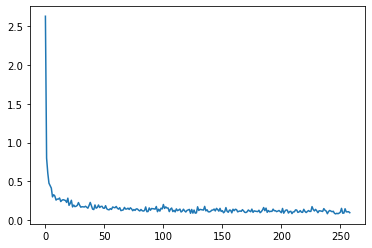

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)